## HW_2 Ishmaeva Bella

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [7]:
def max_element(arr):
    index = np.where(arr == 0)[0] + 1
    if not index.any():
        return "None"
    else:
        index = index[np.where(index < len(arr))]
        res = arr[index].max()
        return res
    return 
 

arr = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])     
max_element(arr)

5

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [8]:
def nearest_value(X, v):
    y = np.abs(X - v)
    res = X[np.where(y == np.min(y))][0]
    return res
    
x = np.arange(0,10).reshape((2, 5))
v = 3.6   

nearest_value(x,v)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [9]:
def scale(X):
    X = (X - X.mean(axis = 0))
    if 0 not in X.std(axis = 0):
        X = X/X.std(axis = 0)
        return X
    else:
        print('division by 0')

X = np.random.randint(2, size=(2, 2)) 
print(X)
scale(X)

[[0 1]
 [1 1]]
division by 0


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [10]:
def get_stats(X):
    print("det: ", np.linalg.det(X))
    print("trace: ", np.matrix.trace(X))
    print("min_value: ", X.min())
    print("max_value: ", X.max())
    print("norm", np.linalg.norm(X, ord = 'fro'))
    print("eug_values: ", np.linalg.eig(X)[0])
    print("eug_vectors: ", np.linalg.eig(X)[1])
    return 

X = np.random.randn(5, 5) + 10
get_stats(X)

det:  -278.325738865
trace:  50.8433100716
min_value:  8.41058598202
max_value:  12.0176119628
norm 50.272248806
eug_values:  [  5.01174151e+01+0.j           2.09205784e+00+0.j          -1.38682276e+00+0.j
   1.03299257e-02+1.38348012j   1.03299257e-02-1.38348012j]
eug_vectors:  [[-0.44049626+0.j         -0.34235360+0.j         -0.64375042+0.j
  -0.04015611+0.25709868j -0.04015611-0.25709868j]
 [-0.44413791+0.j         -0.48865461+0.j          0.22772254+0.j
   0.69125680+0.j          0.69125680-0.j        ]
 [-0.46256650+0.j          0.09979587+0.j          0.51144741+0.j
  -0.25187139+0.33515349j -0.25187139-0.33515349j]
 [-0.43275860+0.j         -0.10215526+0.j          0.32908224+0.j
  -0.26089691-0.34693745j -0.26089691+0.34693745j]
 [-0.45547425+0.j          0.78969346+0.j         -0.40478917+0.j
  -0.12838474-0.27160506j -0.12838474+0.27160506j]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [11]:
result = np.zeros(100)
for exp_num in range(100):
    X = np.random.randn(10, 10) 
    Y = np.random.randn(10, 10) 
    max_value = np.dot(X, Y).max()
    result[exp_num] =  max_value
   
    
print("Среднее по эксперименту: ", result.mean())
print("95-процентный квантиль: ", np.percentile(result, 95))

Среднее по эксперименту:  8.15228819099
95-процентный квантиль:  11.1381928464


## Линейная регрессия

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [65]:
df = pd.read_csv("2008.csv")

In [66]:
print("Все пропуски в df: ", df.isnull().sum().sum())
print("Пропуски в объясняемых признаках: ", df.drop("DepDelay", axis = 1).isnull().sum().sum())
print("Кол-во признаков в df хотя бы с одним пропуском: ", df.shape[1] - df.isnull().any(axis=0).sum())
print("Кол-во объектов в df хотя бы с одним пропуском: ", df.isnull().any(axis=1).sum())

Все пропуски в df:  355215
Пропуски в объясняемых признаках:  353816
Кол-во признаков в df хотя бы с одним пропуском:  13
Кол-во объектов в df хотя бы с одним пропуском:  70000


In [67]:
print("Кол-во пропусков в целевой переменной: ", df.DepDelay.isnull().sum())

Кол-во пропусков в целевой переменной:  1399


Необходимо посмотреть только на те данные, у которых в целевой перемнной стоят пропуски. 

В данной [статье](https://medium.com/@numanyilmaz61/handling-missing-data-93d3ce5d0161) автор рассказывает, как можно справляться с пропусками в данных и, в частности, пользуется таблицей из пакета **missingno** (Ссылка на [репозиторий](https://github.com/ResidentMario/missingno)). Мы также воспользуемся такой таблицей.


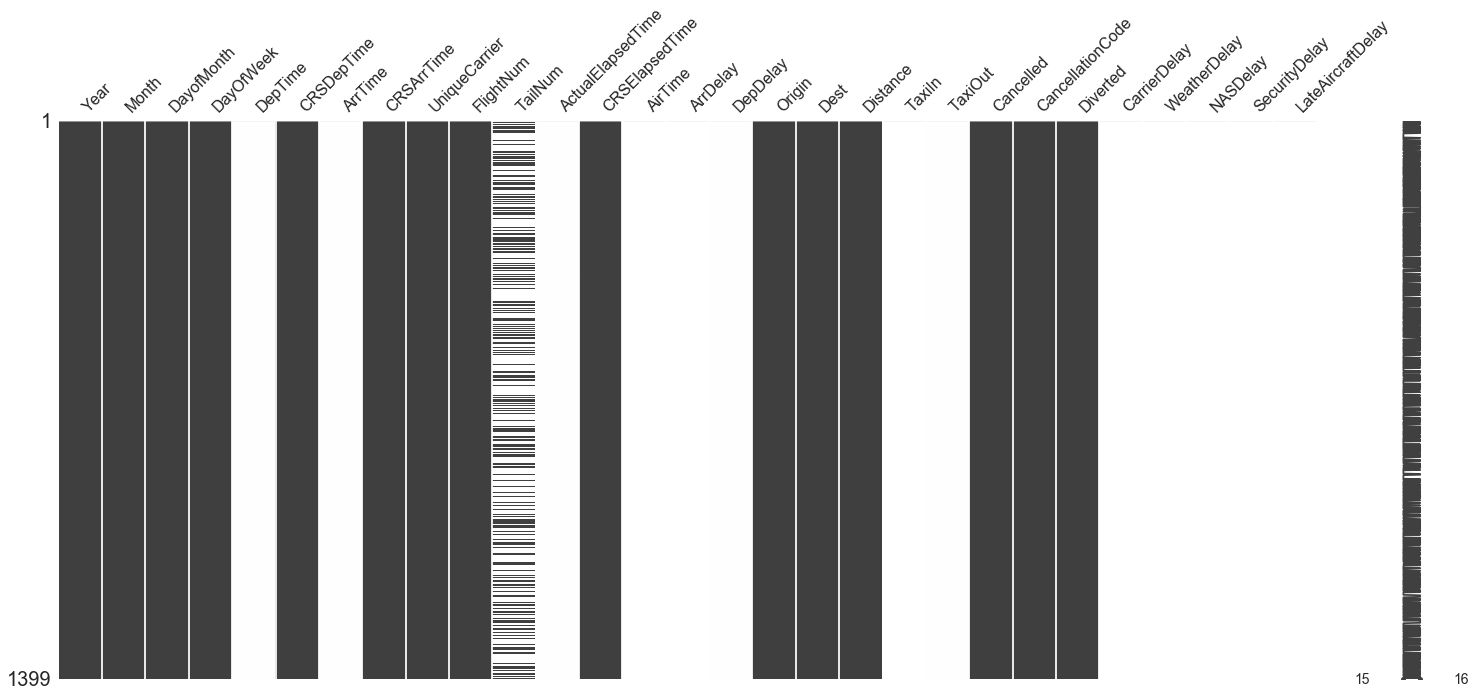

In [68]:
import missingno as msno 
%matplotlib inline 
msno.matrix(df[df.DepDelay.isnull()])

Можно увидеть, что если переменная Cancelled и CancellationCode принимает ненулевое значение, все перечисленные выше переменные, включая нашу целевую, будут NaN. Так как мы все равно удаляем все нулевые и пропущенные значения DepDelay, эти две переменные можно исключить из рассмотрения.

Стоит также отметить, что пропуски в DepDelay имеют место тогда же, когда и пропуски в переменных: DepTime, ArrTime, ActualElapseTime, AirTime, ArrDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SequrityDelay, LateAircraftDelay. То есть в тех случаях, когда отсутствуют данные по actual временным характеристикам рейса (реальное время полета, прибытия, таксировани и тд), то мы видим пропуски во всех этих переменных одновременно.



In [69]:
df = df.dropna(subset=["DepDelay"])
df = df[df.DepDelay != 0]

df = df.drop(["Cancelled", "CancellationCode"], axis = 1)

X = df.drop("DepDelay", axis = 1)
y = df.DepDelay

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [70]:
features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
X[features].isnull().sum()

DepTime         0
CRSDepTime      0
ArrTime       140
CRSArrTime      0
dtype: int64

In [71]:
for i in features:
    col_hour = i + "_Hour"
    col_minute = i + "_Minute"
    if i != "ArrTime":
        X[col_hour] = [int(X[i].iloc[j]//100) for j in range(X.shape[0])]
        X[col_minute] = [int(X[i].iloc[j] - (X[i].iloc[j]//100)*100) for j in range(X.shape[0])]
    
    else:
        hour = []
        minute = []
        
        for j in range(X.shape[0]):
            if X[i].iloc[j] == X[i].iloc[j]:
                hour.append(int(X[i].iloc[j]//100))
                minute.append(int(X[i].iloc[j] - (X[i].iloc[j]//100)*100))
            else:
                hour.append(float("NaN"))
                minute.append(float("NaN"))
        
        X[col_hour] = hour
        X[col_minute] = minute

In [72]:
X= X.drop(features, axis = 1)

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

**ArrTime, CRSArrTime, AirTime, ArrDelay** - переменные связанные с прибытием самолета в пункт назначения. Это просиходит после DepDelay, поэтому скорее отражает его результат, но не объясняет целевую переменную
**SecurityDelay, CarrierDelay, WeatherDelay, NASDelay, LateAircraftDelay** - переменные напрямую влияющие (определяющие размер) DepDelay. Если имеются эти данные задача предсказания  DepDelay теряет смысл.

In [73]:
X = X.drop(["TailNum","Year"], axis = 1)
X = X.drop(['ArrDelay', 'AirTime', 'ArrDelay', 'SecurityDelay', 'CarrierDelay','WeatherDelay', 'NASDelay', 'LateAircraftDelay'], axis = 1)

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

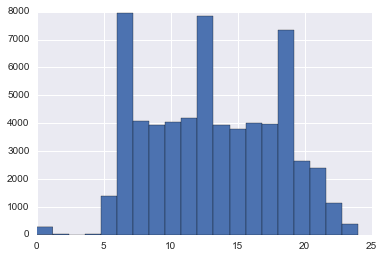

In [74]:
X['DepTime_Hour'].hist(bins=20)

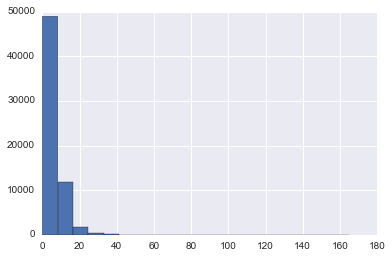

In [75]:
X['TaxiIn'].hist(bins=20)

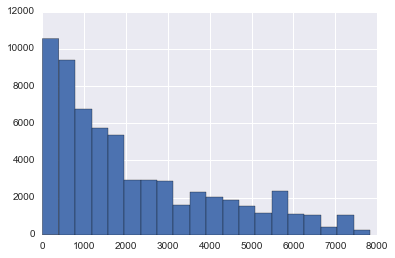

In [76]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Дело в том, что наши переменные имеют разный масштаб, а значит с точки зрения модели изменения, например, в DepTime_Hour будут несоизмеримыми с изменениями в переменной FlightNum, которая измеряется тысячами. Чтобы они были сравнимы между собой, необходимо отмасштабировать признакми.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [78]:
from sklearn.preprocessing import StandardScaler

def transform_data(X):
    num_columns = X._get_numeric_data().columns
    cat_columns = list(set(X.columns) - set(num_columns))
    
    X[num_columns] = X[num_columns].fillna(0)
    X[cat_columns] = X[cat_columns].fillna('nan')
    
    scaler = StandardScaler()
    scaler.fit(X[num_columns])
    X[num_columns] = scaler.transform(X[num_columns])

    X = pd.get_dummies(X, cat_columns)
    
    return X

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [79]:
X = transform_data(X)
print("Получилось признаков: ", X.shape[1])

Получилось признаков:  632


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [80]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [82]:
X_train_short = X_train[:1000]
y_train_short = y[:1000]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

linreg = LinearRegression()
linreg.fit(X_train_short, y_train_short)
y_hat_insample = linreg.predict(X_train_short)
y_hat = linreg.predict(X_test)


print("MSE  на train: ", mean_squared_error(y_train_short,y_hat_insample ))
print("MSE  на test: ", mean_squared_error(y_test, y_hat))
print("R^2  на train: ", r2_score(y_train_short,y_hat_insample ))
print("R^2  на test: ", r2_score(y_test, y_hat))

MSE  на подвыборке:  638.039462433
MSE  на контрольной выборке:  1.24721801138e+25
R^2  на подвыборке:  0.307163054801
R^2  на контрольной выборке:  -9.3238166202e+21


In [83]:
linreg.coef_[:40]

array([  5.37236567e-02,   6.62273183e-01,   6.74083823e-01,
        -2.48518167e+00,  -6.15895034e-01,  -2.00872852e+01,
         1.85622812e+01,   6.61833179e-02,   8.89540787e-01,
         7.96664952e-02,  -2.69696874e+00,   8.24417618e-01,
         1.13216560e+00,  -1.74372220e+00,   2.02948110e+00,
        -1.46144319e+00,  -2.87548035e+00,   2.56131917e+00,
        -2.43718547e+13,  -2.43718547e+13,   6.22673622e+13,
        -2.43718547e+13,  -2.43718547e+13,  -2.43718547e+13,
        -2.43718547e+13,  -2.43718547e+13,  -2.43718547e+13,
        -2.43718547e+13,  -2.43718547e+13,  -2.43718547e+13,
        -2.43718547e+13,  -2.43718547e+13,  -2.43718547e+13,
        -2.43718547e+13,  -2.43718547e+13,  -2.43718547e+13,
        -2.43718547e+13,  -2.43718547e+13,   8.60450277e+12,
        -5.24873173e+12])

Тот факт, что R^2 сильно падает на тестовой выборке, означает, что мы переобучились.
Также по коэффициентам видно, что есть много очень больших по абсолютному значению(e+13 = 10^13), что тоже является признаком переобучения.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [108]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alpha_grid = [0.1, 1, 5, 10]

ridge = RidgeCV(alpha_grid, cv = 5)
ridge.fit(X_train_short, y_train_short)

y_hat_insample = ridge.predict(X_train_short)
y_hat = ridge.predict(X_test) 


print("MSE  на train: ", mean_squared_error(y_train_short,y_hat_insample ))
print("MSE  на test: ", mean_squared_error(y_test, y_hat))
print("R^2  на train: ", r2_score(y_train_short,y_hat_insample ))
print("R^2  на test: ", r2_score(y_test, y_hat))

MSE  на train:  771.406787487
MSE  на test:  1439.85620846
R^2  на train:  0.16234158917
R^2  на test:  -0.0763920280717


In [110]:
ridge.coef_[:40]

array([ 0.44463224,  0.55036745,  0.29993235, -1.33039678, -0.11326872,
       -4.04245029,  2.97300926, -0.24945688,  1.15378469,  0.48724712,
       -3.18108253,  0.34344031,  1.69631821, -1.81335868,  1.54429434,
       -1.22874875, -2.37321134,  2.02665648,  0.96030779,  2.06094947,
        0.        , -3.63660436,  1.40171873,  6.26700818, -3.94642805,
        6.22591868,  3.11863749,  1.26058337, -0.28047909,  2.26492845,
       -3.54428995,  8.16444374, -4.47422052, -6.21490957, -0.27801514,
       -4.10132714, -1.98931147, -3.25891058,  0.        , -0.79031564])

In [109]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_short, y_train_short)

y_hat_insample = lasso.predict(X_train_short)
y_hat = lasso.predict(X_test) 

print("MSE  на train: ", mean_squared_error(y_train_short,y_hat_insample ))
print("MSE  на test: ", mean_squared_error(y_test, y_hat))
print("R^2  на train: ", r2_score(y_train_short,y_hat_insample ))
print("R^2  на test: ", r2_score(y_test, y_hat))

MSE  на train:  906.217752069
MSE  на test:  1370.79897237
R^2  на train:  0.0159524982438
R^2  на test:  -0.0247669713659


In [111]:
lasso.coef_[:40]

array([ 0.        ,  0.19770028,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.78897743,  0.        ,
       -1.71940112,  0.        , -0.        , -1.03981269, -0.        ,
       -0.55951116, -0.37035502,  0.94547721, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ])

Как можно увидеть коэффициенты при признаках стали значительно меньше (в случае с lasso большинство вообще занулилось). Так же видно, что размер самих коэффициентов тоже значительно снизился из-за штрафов, которые ridge и lasso на них налагют. В результате, мы видим, что R^2 на train и test ведет себя почти одинаково, а MSE на test больше, чем на train, что логично ожидать. Нет признаков переобучения.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [112]:
X_train["1"] = [1]*X_train.shape[0]
X_test["1"] = [1]*X_test.shape[0]

/Users/Bella/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Bella/Applications/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [113]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.multiply(X,w)

In [114]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    res = []
    for i in y:
        res.append((i - make_pred(X, w))^2/i)
    return res.sum()/len(res)    

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return get_func(w, X, y) + make_pred(w, w)

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here